
# Project: Investigate Appointment No-Show Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I'm taking a look at "Medical Appointment No Shows" data. The data shows over 11k rows of medical appointments and if the patients indeed came to the appointments or not. The data collected is listed at the bottom of this cell.

Using Python library's data analytic capability, I'll investigate whether the following factors affect people to skip their appointments which can causes loss of revenue.


* Time of the day
* Day of Week
* Handicapped or not
* Neighborhood where the medical facility is located

The original data can be found at Kaggle website(https://www.kaggle.com/joniarroba/noshowappointments). It is distributed under Creative Commons license.

##### Data Dictionary  
Below is the data dictionary found at the above site.
* PatientId - Identification of a patient  
* appointmentID - Identification of each appointment 
* Gender = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. 
* ScheduledDay (DataMarcacaoConsulta) = The day of the actual appointment, when they have to visit the doctor. 
* AppointmentDay (DataAgendamento) = The day someone called or registered the appointment, this is before appointment of course. (My note: Agendamento = Booking)
* Age = How old is the patient. 
* Neighbourhood = Where the appointment takes place. 
* Scholarship = Ture of False (Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
* Hipertension = True or False 
* Diabetes = True or False 
* Alcoholism = True or False 
* Handcap = True or False (My note: The data author posted this comment. "...sorry for the delay, the handcap refers to the number of desabilites a person has. For example, if the person is blind and can't walk the total is 2...") https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699
* SMS_received = 1 or more messages sent to the patient. 
* No-show = True or False. 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In this section, I'll take a look at the original data and its structure. My goal is to identify unwanted data and scrub them out. 

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Enables the inline backend
%matplotlib inline 

#### Step 1: Load original CSV file and check first five lines

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016_1.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Step 2: Investigate data shape, data type.

There are 14 columns, 110527 rows in the original data. 

There is no missing values.

Scheduled Day (the day of actual appointment) should be converted to Date data type so I can extract day of week and hour information.

In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Step 3: Check for unique values, Null values, and duplicates

There is no null or duplicate values!

In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
sum(df.duplicated())

0

### Data Cleaning

I'm going to tidy up data by following steps.

* Drop columns I'm not going to look.
* Make column names consistent by:
    * converting them to all lower case
    * replacing '-' to '_'.
    * Inserting '_' between words
* Convert ScheduledDay to datetime data type.
* Add day of week, and hour for better analysis

In [8]:
# Remove unwanted data
df.drop(['PatientId', 'Gender', 'AppointmentDay'], axis=1, inplace=True)

In [9]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [10]:
df.rename(columns={'scheduledday': 'scheduled_day'}, inplace=True)
df.rename(columns={'appointmentid': 'appointment_id'}, inplace=True)

In [12]:
# Convert to datetime so I can extract day of week and time.
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']) 

In [13]:
df['day_of_week'] = df['scheduled_day'].dt.weekday

In [14]:
df['hour'] = df['scheduled_day'].dt.hour

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
appointment_id    110527 non-null int64
scheduled_day     110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
day_of_week       110527 non-null int64
hour              110527 non-null int64
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 11.0+ MB


In [16]:
# Quick look at the converted data...
df.tail(5)

,appointment_id,scheduled_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_of_week,hour
110522,5651768,2016-05-03 09:15:35,56,MARIA ORTIZ,0,0,0,0,0,1,No,1,9
110523,5650093,2016-05-03 07:27:33,51,MARIA ORTIZ,0,0,0,0,0,1,No,1,7
110524,5630692,2016-04-27 16:03:52,21,MARIA ORTIZ,0,0,0,0,0,1,No,2,16
110525,5630323,2016-04-27 15:09:23,38,MARIA ORTIZ,0,0,0,0,0,1,No,2,15
110526,5629448,2016-04-27 13:30:56,54,MARIA ORTIZ,0,0,0,0,0,1,No,2,13


### Save cleaned data under a new name

In [17]:
df.to_csv('no_show_cleaned.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Load cleaned data

In [18]:
df = pd.read_csv('no_show_cleaned.csv')
df.head()

,appointment_id,scheduled_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_of_week,hour
0,5642903,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,18
1,5642503,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,16
2,5642549,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,16
3,5642828,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,17
4,5642494,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,16


In [19]:
#Verify that data has been loaded.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
appointment_id    110527 non-null int64
scheduled_day     110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
day_of_week       110527 non-null int64
hour              110527 non-null int64
dtypes: int64(10), object(3)
memory usage: 11.0+ MB


### Define common properties

#### 1. Data properties

In [20]:
# Assing these names to variable for case consistency...
s_total = 'Total'
s_show = 'Show'
s_no_show = 'No-Show'

In [21]:
total_entry = df.count()['appointment_id']

In [22]:
# To avoid misunderstanding, create filters from no_show colum
filter_show = df['no_show'] == 'No'
filter_no_show = df['no_show'] == 'Yes'

In [23]:
show = (filter_show).sum()
no_show = (filter_no_show).sum()

In [24]:
show_vs_noshow = {s_show: show, s_no_show: no_show}

#### 2. Chart properties

In [25]:
c_dict = {s_total: 'blue', s_show: 'green', s_no_show:'orange'}
width = 0.3

### Overview: No-Show ratio 

How many appointments are No-Show?

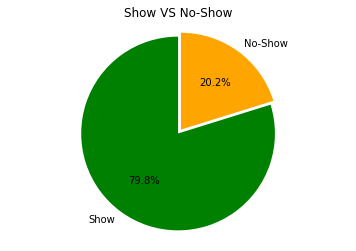

In [27]:
# Create a pie chart to clarify No-Show rate.

plt.pie(show_vs_noshow.values(), labels = [s_show, s_no_show], shadow = False, 
        colors = [c_dict[s_show], c_dict[s_no_show]],
        explode = (0 , 0.05), # One slide exploded out slightly
        startangle = 90, 
        autopct = '%1.1f%%' # percent with fraction
       )
plt.axis('equal') # Round circle
plt.title('Show VS No-Show')
plt.show();

#### Findings: About one in five people don't show up to their appointments. That is a siginificant portion.

### Research Question 1: Time of day

Does appointment time affect No-Show?

Group data by hour extracted from Schedule Day data to find this out.

In [28]:
# What is range of time in this dataframe?
# --> 6AM to 9 PM
the_list = df['hour'].unique()
the_list.sort()
print(the_list)

[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [42]:
counts = df.groupby(['no_show', 'hour']).count()['appointment_id']
show_proportion = counts['No'] / show_vs_noshow[s_show]
no_show_proportion = counts['Yes'] / show_vs_noshow[s_no_show]

In [43]:
total_proportion = (counts['Yes'] + counts['No']) / total_entry

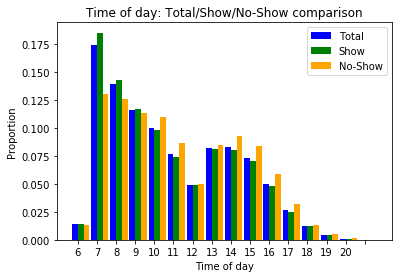

In [44]:
# Grouped by Hour - Plot total appointments, Show, and No-Show side by side of trend analysis.

#Index is the length of data
idx = np.arange(len(total_proportion))

#Create three bars for each data type
total_bars = plt.bar(idx, total_proportion, width, 
                     color=c_dict[s_total], label=s_total)
show_bars = plt.bar(idx + (width), show_proportion, width, 
                    color=c_dict[s_show], label=s_show)
no_show_bars = plt.bar(idx + (width * 2), no_show_proportion, width, 
                       color=c_dict[s_no_show], label=s_no_show)

# title and labels
plt.title('Time of day: Total/Show/No-Show comparison')
plt.ylabel('Proportion')
plt.xlabel('Time of day')
locations = idx + (width / 2) # Recalculate locations every time as idx changes

labels = [] # xtick labels
for x in range(the_list.min(), the_list.max(), 1): # Range of earliest time to latest time.
    labels.append(str(x))
plt.xticks(locations, labels)

# legend
plt.legend();

####  No-Show rate is slightly higher in 10-11AM and 2-5PM. It might indicates that either work or traffic is blocking people from going to medical appointment.  

On the other hand, Show rate is higher on left side (early morning) which is before regular work hours.

### Research Question 2: Day of Week

Does day of week impact No-Show rate?

In [32]:
counts2 = df.groupby(['no_show', 'day_of_week']).count()['appointment_id']
show_proportion2 = counts2['No'] / show_vs_noshow[s_show]
no_show_proportion2 = counts2['Yes'] / show_vs_noshow[s_no_show]
total_proportion2 = (counts2['Yes'] + counts2['No']) / total_entry

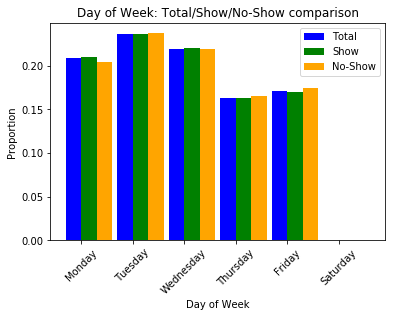

In [45]:
# Grouped by Day of week - Plot total appointments, Show, and No-Show side by side of trend analysis.

#Index is the length of data
idx = np.arange(len(total_proportion2))

total_bars2 = plt.bar(idx, total_proportion2, width, 
                      color=c_dict[s_total], label=s_total)
show_bars2 = plt.bar(idx + (width), show_proportion2, width, 
                     color=c_dict[s_show], label=s_show)
no_show_bars2 = plt.bar(idx + (width * 2), no_show_proportion2, width, 
                        color=c_dict[s_no_show], label=s_no_show)

plt.title('Day of Week: Total/Show/No-Show comparison')
plt.ylabel('Proportion')
plt.xlabel('Day of Week')
locations = idx + (width / 2)

wk_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.xticks(locations, wk_labels, rotation='45')

plt.legend();

#### I can't observe noticeable differences in Total/Show/No-Show rates according to the day of week.

It seems that this doesn't impact people's ability to show up to medical appointment.

### Research Question 3: Handicap

Are people with handicap more likely to miss appointments? 

If so, there may be problem with transportation or infrastructures.


In [34]:
# What is the values in 'handcap' column?
df['handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

According to the author, handicap = 0 means "No handicap" and > 0 means "with one or more handicap".

I need to devide data between 0 and not 0.


In [36]:
counts3 = df.groupby(['no_show', 'handcap']).count()['appointment_id']
show_proportion3 = counts3['No'] / show_vs_noshow[s_show]
no_show_proportion3 = counts3['Yes'] / show_vs_noshow[s_no_show]
total_proportion3 = (counts3['Yes'] + counts3['No']) / total_entry

In [37]:
adj_total = [total_proportion3[0], total_proportion3.sum() - total_proportion3[0]]
adj_show = [show_proportion3[0], show_proportion3.sum() - show_proportion3[0]]
adj_no_show = [no_show_proportion3[0], no_show_proportion3.sum() - no_show_proportion3[0]]

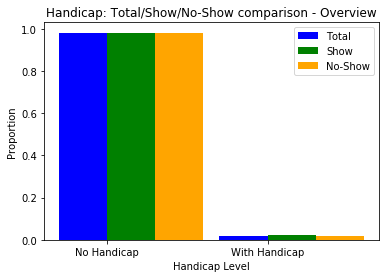

In [46]:
# Grouped by Handicap or not - Plot total appointments, Show, and No-Show side by side of trend analysis.

# Index is the length of data
idx = np.arange(len(adj_total))

total_bars3 = plt.bar(idx, adj_total, width, 
                      color=c_dict[s_total], label=s_total)
show_bars3 = plt.bar(idx + (width), adj_show, width, 
                     color=c_dict[s_show], label=s_show)
no_show_bars3 = plt.bar(idx + (width * 2), adj_no_show, width, 
                        color=c_dict[s_no_show], label=s_no_show)

# title and labels
plt.title('Handicap: Total/Show/No-Show comparison - Overview')
plt.ylabel('Proportion')
plt.xlabel('Handicap Level')
locations = idx + (width / 2)  # xtick locations

labels = ['No Handicap', 'With Handicap']
plt.xticks(locations, labels)
# legend
plt.legend();

#### Above comparison doesn't show the ratio for handicapped people. 
#### Below chart extract handicapped portion only

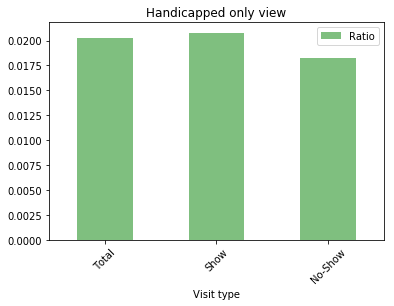

In [47]:
#Extracting Handicapped part only
df_hc = pd.DataFrame({'Visit type':[s_total, s_show, s_no_show], 
                      'Ratio':[adj_total[1], adj_show[1], adj_no_show[1]]})
plt_hc =  df_hc.plot.bar(x='Visit type', y='Ratio', rot=45, title='Handicapped only view', 
                    color='green', alpha=0.5);
plt_hc.legend();

#### It doesn't seem that handicap condition affect Show/No-Show ratio.


### Research Question 4: The Neighborhood

Would location of medical facility affect No-Show rate?

This will be a busy map. I'll only compare Show and No-Show data.

In [40]:
neighbourhoods = df['neighbourhood'].unique()

In [48]:
counts4 = df.groupby(['no_show', 'neighbourhood']).count()['appointment_id']
show_proportion4 = counts4['No'] / show_vs_noshow[s_show]
no_show_proportion4 = counts4['Yes'] / show_vs_noshow[s_no_show]

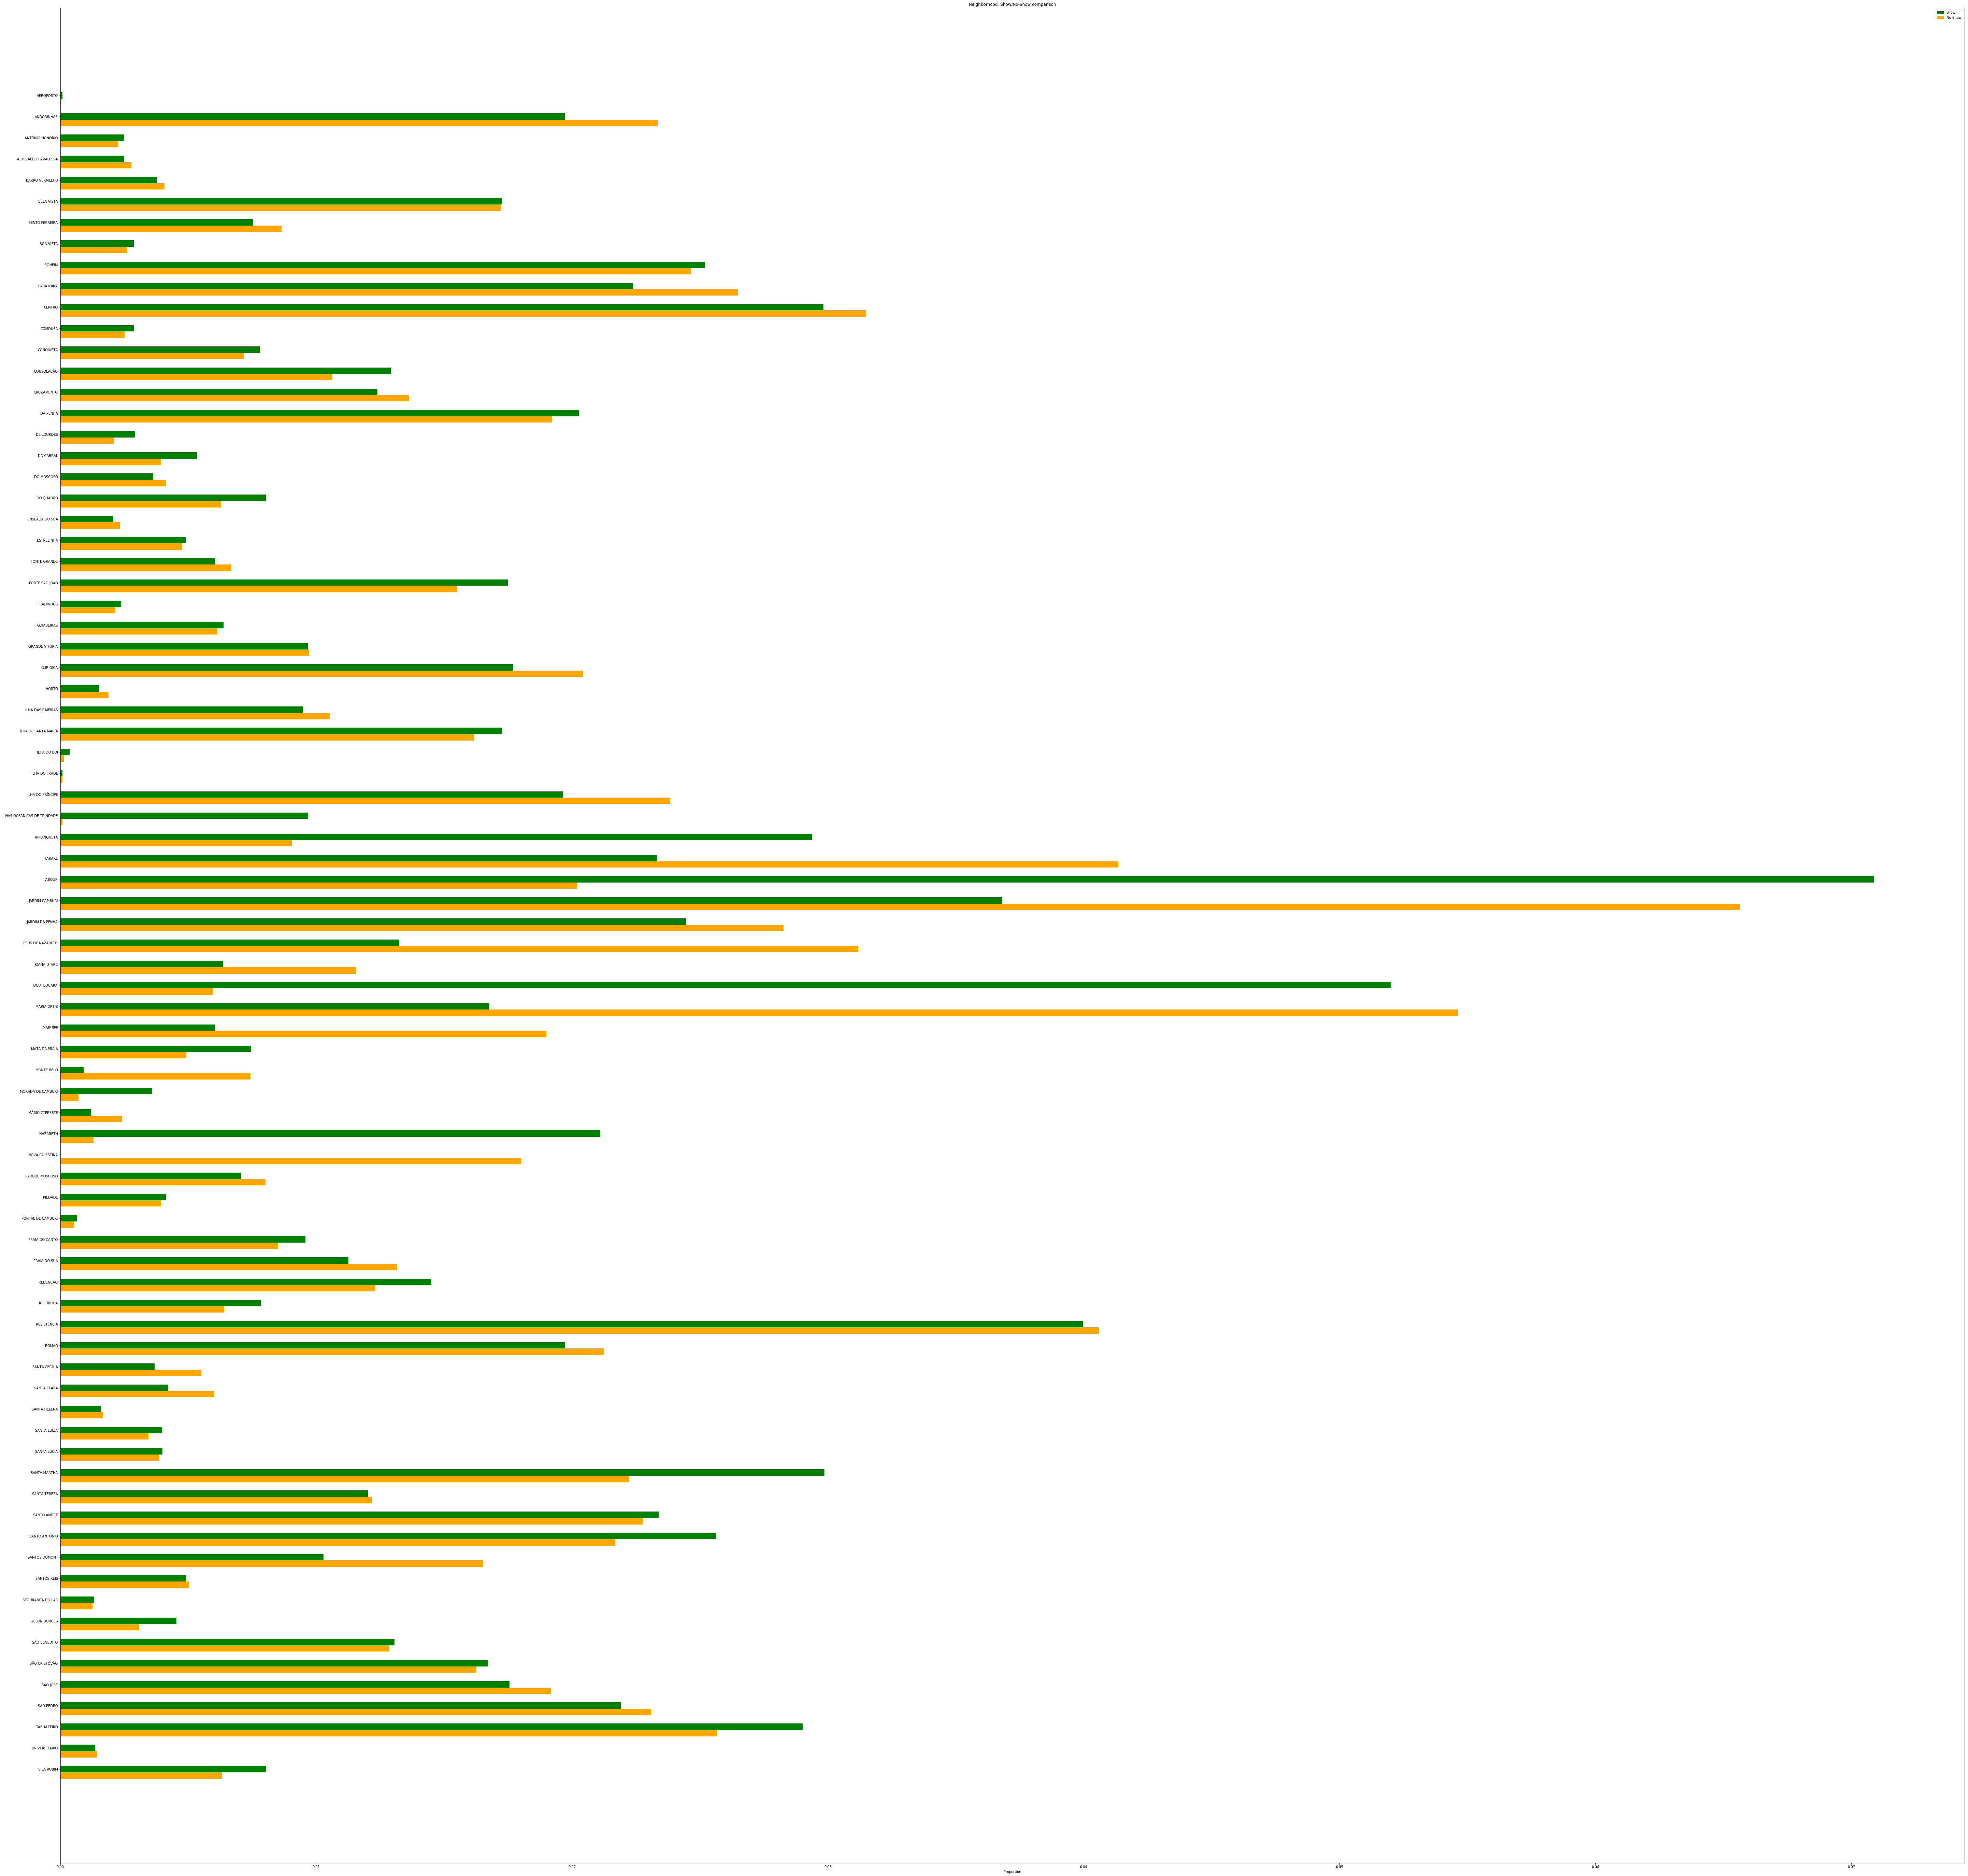

In [49]:
# plot bars side by side

#Index is the length of data
idx = np.arange(len(no_show_proportion4))

fig, ax = plt.subplots(figsize=(100, 100))

#total_bars = ax.barh(idx, total_proportion.values, width, color=total_color, label='Total')
show_bars = ax.barh(idx, show_proportion4.values, width, 
                    color=c_dict[s_show], label=s_show)
no_show_bars = ax.barh(idx + width, no_show_proportion4.values, width, 
                       color=c_dict[s_no_show], label=s_no_show)

labels = []
for i in range(len(no_show_proportion4)):
    labels.append(no_show_proportion4.index[i])
    
ax.set_yticks(idx)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Proportion')
ax.set_title('Neighborhood: Show/No-Show comparison')

plt.legend()
plt.show();


#### Clearly some neighborhood shows differences between Show/No-Show trend.

No-Show ratios seems to be much higher than show ratio in communities like ANDORINHAS, GURIGICA, ILHA DO PRÍNCIPE, JESUS DE NAZARETH, NOVA PALESTINA. This  data is worth investigating into.

Double click the plot to enlarge the chart.

<a id='conclusions'></a>
## Conclusions

### Findings
While looking through data, I was surprised not to find many attributes that contributes to Show/No-Show differences. For example, handicap, day of week, (although not shown here, I also looked at) age, gender, etc.

On the other hand, it seems that medical facility's location affects No-Show rate. Also, time of day has slight impact. This could be caused by to work schedule, school schedule, public transportation availability, distance to the facility.

### Limitations
The original data doesn't include data from all months. It isn't clear if major holiday month (such as December with Christmas holidays) has any impact. I'm also curious about weather's impact.

### References
* The original data's data dictionary and discussion board helped me decode values in the CSV file ( https://www.kaggle.com/joniarroba/noshowappointments/)
* Pandas Exercises - Visualization by Guilherme Samora https://github.com/guipsamora/pandas_exercises/tree/master/07_Visualization
* Matplotlib documentation - https://matplotlib.org/index.html
* Pandas documentation - https://pandas.pydata.org/
* Numpy documentation - http://www.numpy.org/

